In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

In [17]:
def create_model_v1():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(), 
        layers.Dense(10)
    ])
    return model

In [4]:
def create_model_v2():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])
    return model


In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.activations import tanh, sigmoid, softsign
def create_model_v3():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=tanh, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation=softsign),
        layers.Conv2D(256, (3, 3), activation=sigmoid),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation=tanh),
        layers.Dense(10)  
    ])
    return model

In [6]:
def train_model(model, version):
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        epochs=10,
        validation_data=(x_val, y_val),
        batch_size=64,
        verbose=2
    )
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Versi {version} - Akurasi Test: {test_acc:.4f}")
    return history

In [18]:
histories = []
for i, create_fn in enumerate([create_model_v1], start=1):
    model = create_fn()
    print(f"\n--- Training Model Versi {i} ---")
    history = train_model(model, version=i)
    histories.append(history)


--- Training Model Versi 1 ---
Epoch 1/10
625/625 - 4s - 6ms/step - accuracy: 0.4379 - loss: 1.5981 - val_accuracy: 0.5174 - val_loss: 1.3863
Epoch 2/10
625/625 - 3s - 4ms/step - accuracy: 0.5496 - loss: 1.2953 - val_accuracy: 0.5691 - val_loss: 1.2562
Epoch 3/10
625/625 - 3s - 5ms/step - accuracy: 0.5886 - loss: 1.1919 - val_accuracy: 0.5774 - val_loss: 1.2193
Epoch 4/10
625/625 - 3s - 5ms/step - accuracy: 0.6084 - loss: 1.1327 - val_accuracy: 0.5982 - val_loss: 1.1647
Epoch 5/10
625/625 - 3s - 5ms/step - accuracy: 0.6257 - loss: 1.0788 - val_accuracy: 0.6080 - val_loss: 1.1440
Epoch 6/10
625/625 - 3s - 5ms/step - accuracy: 0.6434 - loss: 1.0375 - val_accuracy: 0.6151 - val_loss: 1.1260
Epoch 7/10
625/625 - 3s - 5ms/step - accuracy: 0.6575 - loss: 0.9968 - val_accuracy: 0.6249 - val_loss: 1.1071
Epoch 8/10
625/625 - 3s - 5ms/step - accuracy: 0.6701 - loss: 0.9643 - val_accuracy: 0.6293 - val_loss: 1.0962
Epoch 9/10
625/625 - 3s - 5ms/step - accuracy: 0.6768 - loss: 0.9360 - val_accur

In [19]:
def plot_training_history(histories, labels):
    plt.figure(figsize=(14, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} Train')
        plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{label} Val')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{label} Val')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

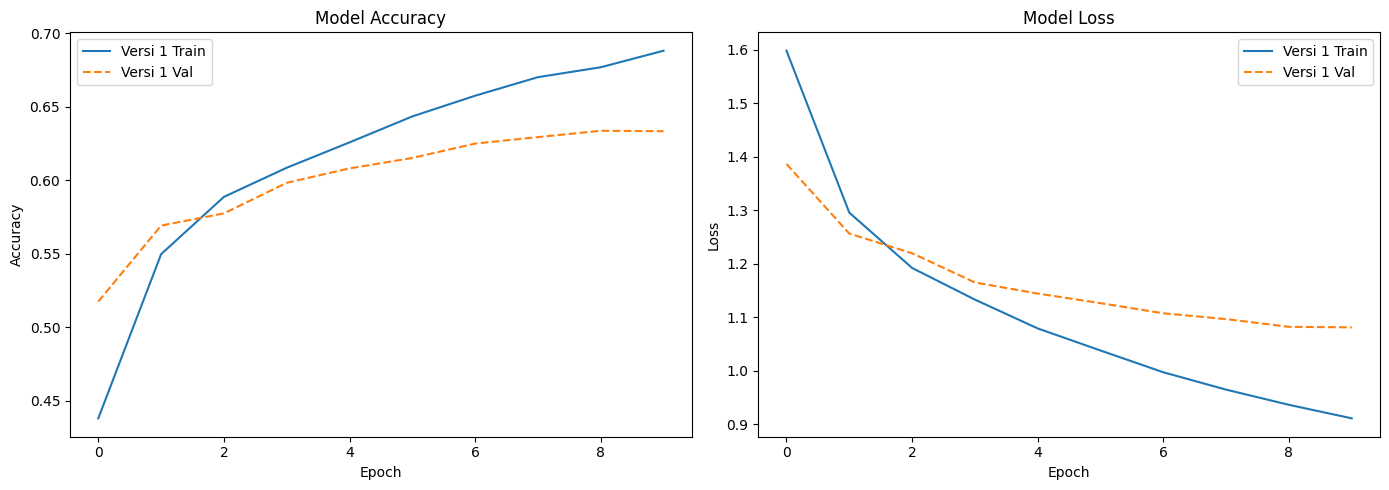

In [20]:
plot_training_history(
    histories=[history],
    labels=["Versi 1"]
)

In [21]:
model.save('tes.h5')

In [22]:
from src.models.cnn.scratch_cnn import ScratchModel


scratch_model = ScratchModel("tes.h5")

In [23]:
scratch_preds = np.argmax(scratch_model.predict_in_batches(x_test, batch_size=1000), axis=1)

Processing batch from index 0
Processing batch from index 1000
Processing batch from index 2000
Processing batch from index 3000
Processing batch from index 4000
Processing batch from index 5000
Processing batch from index 6000
Processing batch from index 7000
Processing batch from index 8000
Processing batch from index 9000


In [24]:
from sklearn.metrics import f1_score


print("Scratch F1 Score:", f1_score(y_test, scratch_preds, average='macro'))

Scratch F1 Score: 0.6282260664947054


In [25]:
keras_preds = np.argmax(model.predict(x_test), axis=1)
print("Keras F1 Score:", f1_score(y_test, keras_preds, average='macro'))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Keras F1 Score: 0.6282260664947054
